### This data set will involve analyzing some poll results
The questions that will be answered during this analysis are:

1) Who was being polled and what was his/her party affiliation?
2) Who did the poll results favour?
3) How do undecided voters effect the poll?
4) Can the undecided voters be accounted for?
5) How did the voter sentiment change over time?
6) Do debates bring about a measurable change in the polls?

In [1]:
# Importing data analysis libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visulaization libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid') # So that all visualizations have a white background
%matplotlib inline

The data for the analysis is obtained from HuffPost Pollster: https://elections.huffingtonpost.com/pollster

In [2]:
import requests # used to grab data from the web 
from io import StringIO # used to work with csv files. Reads and writes strings as files.

#### Visit https://pymotw.com/3/index.html for more information about various modules like the io module

In [3]:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

In [4]:
source = requests.get(url).text # using requests to get the information off the web using 'get()' to read the csv file as 
                                  # a text file using 'text'

poll_data = StringIO(source)

In [5]:
poll_df = pd.read_csv(poll_data)
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,YouGov/Economist,2015-06-20,2015-06-22,2015-06-26T01:02:40Z,266.0,Registered Voters - independent,Internet,34.0,45.0,NaN,21.0,https://elections.huffingtonpost.com/pollster/...,https://d25d2506sfb94s.cloudfront.net/cumulus_...,Nonpartisan,None,NaN,1
1518,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,32.0,50.0,3.0,14.0,https://elections.huffingtonpost.com/pollster/...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,NaN,1
1519,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,5.0,89.0,0.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,NaN,1
1520,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,679.0,Registered Voters - Republican,Live Phone,68.0,9.0,4.0,19.0,https://elections.huffingtonpost.com/pollster/...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,NaN,1


In [6]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.3+ KB


In [7]:
poll_df.isnull().sum()

Pollster                    0
Start Date                  0
End Date                    0
Entry Date/Time (ET)        0
Number of Observations    509
Population                  0
Mode                        0
Trump                       0
Clinton                     0
Other                     424
Undecided                  62
Pollster URL                0
Source URL                  0
Partisan                    0
Affiliation                 0
Question Text             861
Question Iteration          0
dtype: int64

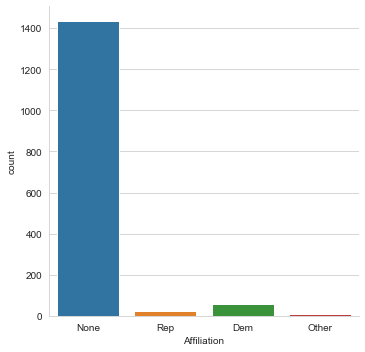

In [8]:
# Performing data visualization on the affiliation
sns.catplot('Affiliation',data=poll_df,kind='count')

In [9]:
poll_df['Pollster'].groupby(poll_df['Affiliation']).count()

Affiliation
Dem        59
None     1434
Other       8
Rep        21
Name: Pollster, dtype: int64

#### Most of the polls have no affiliation, and the polls affiliated to Democrats are more than twice of Republican affiliated ones 

In [10]:
poll_df['Population'].unique()

array(['Likely Voters', 'Likely Voters - Democrat',
       'Likely Voters - Republican', 'Likely Voters - independent',
       'Registered Voters', 'Registered Voters - Democrat',
       'Registered Voters - Republican',
       'Registered Voters - independent', 'Adults'], dtype=object)

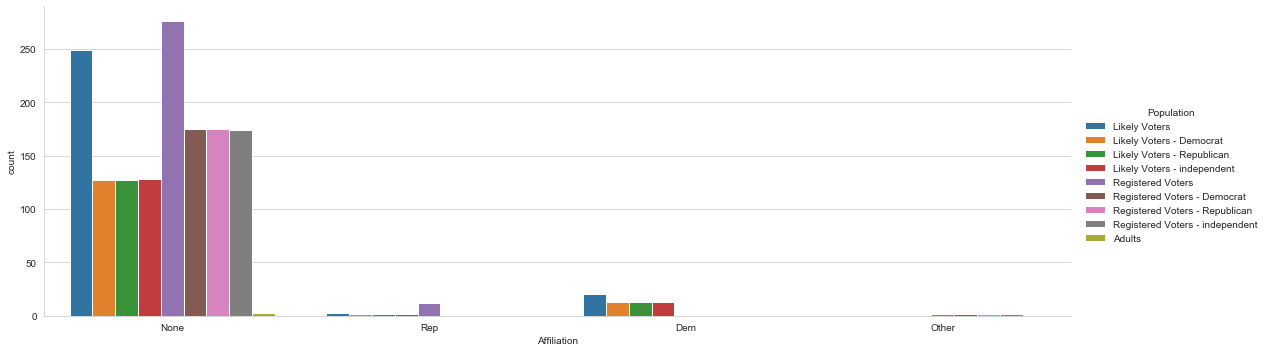

In [11]:
sns.catplot('Affiliation', data=poll_df,hue='Population',kind='count',aspect=3)

In [12]:
poll_df['Affiliation'].groupby(poll_df['Population']).count()

Population
Adults                               3
Likely Voters                      272
Likely Voters - Democrat           142
Likely Voters - Republican         142
Likely Voters - independent        143
Registered Voters                  290
Registered Voters - Democrat       177
Registered Voters - Republican     177
Registered Voters - independent    176
Name: Affiliation, dtype: int64

There is a majority of likely voters and registered voters. So, the poll data should be a reliable prediction of the populations polled.

In [13]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


### Finding the average of Trump, Clinton and those who remained undecided

In [14]:
avg = DataFrame(poll_df.mean()) # Created a dataframe of average values in poll_df
avg.drop(['Number of Observations','Question Iteration','Other'],axis=0,inplace=True) # axis=0 means along the rows and inplace=True modifies the original
                                                       # dataframe. Since the values of interest are the average values of
                                                       # Trump, Clinton and remaining ones, the 3 columns are dropped.
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Undecided,9.315068


In [15]:
# Finding the standard deviation in a similar way
std = DataFrame(poll_df.std())
std.drop(['Number of Observations','Question Iteration','Other'],axis=0,inplace=True)
std

,0
Trump,23.566390
Clinton,25.298731
Undecided,6.253118


### Plotting the average sentiment of all polls

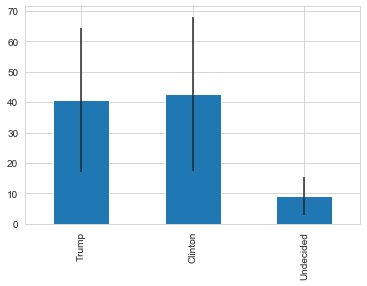

In [16]:
avg.plot(yerr=std,kind='bar',legend=False)

Clinton had a sentiment of 42 and Trump 40. Both are within their std. deviation. So the undecided voters would have made
an impact

In [17]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg

,0,0
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Undecided,9.315068,6.253118


In [18]:
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Undecided,9.315068,6.253118


### If the split of the undecided votes is assumed to occur evenly between the two, the estimate will be an unbiased one

Time Series Analysis of voter sentiment by plotting Clinton, Trump favor versus poll end dates

In [19]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


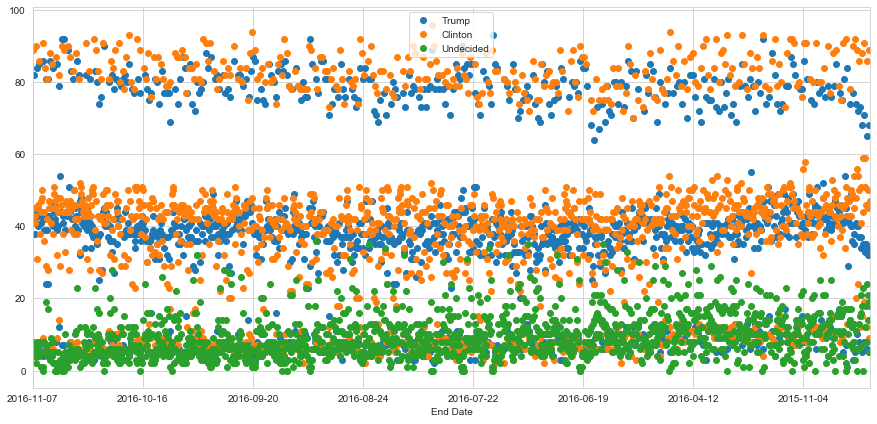

In [20]:
poll_df.plot(x='End Date', y=['Trump','Clinton','Undecided'],linestyle='',marker='o', figsize=(15,7))

#### As can be seen, the eariler dates are to the right. The undecided voters move towards zero as time progresses, which makes sense as those who are undecided eventually decide upon a candidate. A better way to plot the above sentiment is to plotthe difference between the two main candidates for each pole with time. For eg: For Insights West, the difference is 45-41=4 

In [21]:
from datetime import datetime

In [22]:
poll_df['Difference']= (poll_df['Trump'] - poll_df['Clinton'])/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,https://elections.huffingtonpost.com/pollster/...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,https://elections.huffingtonpost.com/pollster/...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [23]:
poll_df = poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


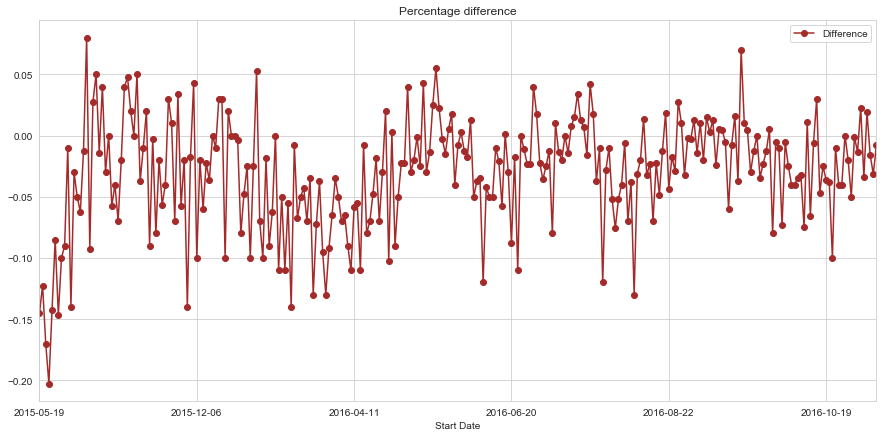

In [24]:
poll_df.plot('Start Date','Difference',figsize=(15,7),linestyle = '-',marker='o',color='brown',
             title='Percentage difference')

#### The debates occured in the months of September and October (26th September, 9th October and 19th October) and can be marked. To find out the dates, a 'for' loop is used

In [25]:
row_in = 0
xlimit=[]
for date in poll_df['Start Date']:
    if date[0:7] =='2016-09'or date[0:7]=='2016-10':
        xlimit.append(row_in)
        row_in+=1
        print(date)
    else: 
        row_in+=1
print(min(xlimit))
print(max(xlimit))

2016-09-01
2016-09-04
2016-09-05
2016-09-06
2016-09-08
2016-09-09
2016-09-10
2016-09-11
2016-09-12
2016-09-15
2016-09-16
2016-09-17
2016-09-18
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-01
2016-10-02
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
209
262


#### Plotting the same graph as above but now with these limits, or in other words zooming in on the September and October dates

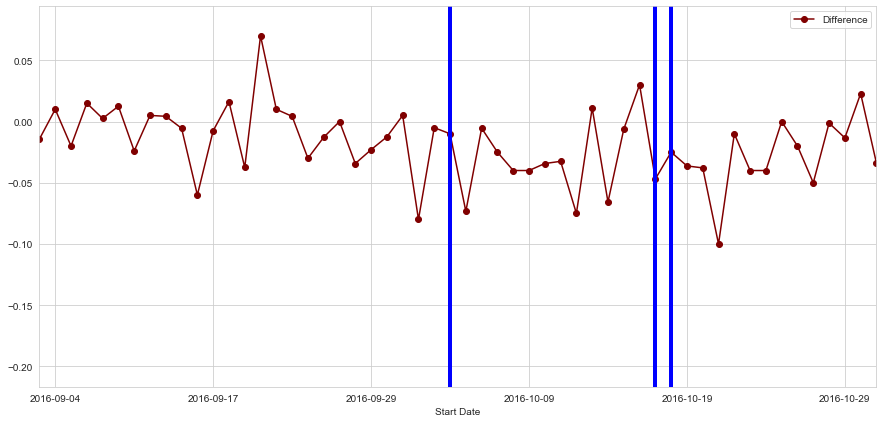

In [26]:
poll_df.plot('Start Date','Difference',figsize=(15,7),linestyle='-',marker='o',color='maroon',xlim=(209,262))

#Plotting a line for each of the three debate dates on top of this graph
# 26th Sep
plt.axvline(x=209+26,linewidth=4,color='blue')
# 9th Oct
plt.axvline(x=235+13,linewidth=4,color='blue')
#19th October
plt.axvline(x=262-13,linewidth=4,color='blue')

### After the first debate, sentiment for Trump fell steeply. But he regained his lead after the second debate